In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout,G
from tensorflow.keras.optimizers import Adam
import numpy as np
import os 
from PIL import Image

In [2]:
def get_jpg_path(file_dir='datasets\\birds\\train\\'):
    path=[]
    clazz=[]
    for root, dirs, files in os.walk(file_dir): 
        if len(dirs)==0:
            cls=root[-3:]
            cls=[int(cls)]*len(files)
            ph=[root+"\\"+p for p in files]
            path.extend(ph)
            clazz.extend(cls)
    return path,clazz
path,clazz=get_jpg_path('datasets\\birds\\train\\')

In [3]:
def enforce(img,corp=(224,224)):
    rs=np.zeros((5,224,224,3))
    box = [(0, 0, 224, 224),
          (76, 0, 300, 224),
          (76, 76, 300, 300),
          (0, 76, 224, 300),
          (38, 38, 262, 262)]
    idx=0
    for b in box:
        region = img.crop(b)
        npre=np.asarray(region)
        rs[idx]=npre
        idx+=1
    return rs

In [4]:
def onehot_label(clazz):
    index=0
    is_insight=set()
    hot=[0]*90
    onehot=[]
    for i in clazz:
        if i not in is_insight:
            is_insight.add(i)
            hot=[0]*90
            hot[index]=1
            index+=1
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
    onehot=np.asarray(onehot)
    return onehot

In [5]:
def del_bad_imgs(path):
    index=0
    for p in path:
        im=Image.open(p)
        npim=np.asarray(im)
        if len(npim.shape)==2:
            os.remove(p)
            print(index,npim.shape,"has been removed")
        index+=1
del_bad_imgs(path)

In [6]:
def reszie_jpg(path,shape=(3830,300,300,3)):
    imgs=[]
    index=0
    for p in path:
        im=Image.open(p)
        im=im.resize(shape[1:3])
        ims=enforce(im)
        for i in ims:
            imgs.append(i)
    return np.asarray(imgs,dtype="float")

In [7]:
imgs=reszie_jpg(path)
imgs.shape

(19120, 224, 224, 3)

In [8]:
onehot=onehot_label(clazz)
onehot.shape

(19120, 90)

In [14]:
imgs12 = imgs[339].astype(np.float32)
imgs12

array([[[146., 139.,  84.],
        [148., 141.,  86.],
        [153., 146.,  92.],
        ...,
        [184., 192., 195.],
        [184., 192., 195.],
        [184., 192., 195.]],

       [[146., 138.,  89.],
        [147., 139.,  90.],
        [152., 144.,  97.],
        ...,
        [187., 195., 198.],
        [187., 195., 198.],
        [186., 194., 197.]],

       [[145., 137.,  88.],
        [146., 138.,  91.],
        [151., 143.,  96.],
        ...,
        [189., 197., 200.],
        [187., 195., 198.],
        [186., 194., 197.]],

       ...,

       [[177., 174., 183.],
        [193., 193., 201.],
        [196., 203., 211.],
        ...,
        [196., 199., 214.],
        [203., 206., 221.],
        [202., 206., 218.]],

       [[203., 200., 211.],
        [193., 193., 203.],
        [204., 211., 221.],
        ...,
        [210., 213., 232.],
        [204., 207., 224.],
        [207., 210., 227.]],

       [[170., 178., 180.],
        [211., 219., 221.],
        [215., 2

In [45]:
min_size_x=imgs[:339]
min_size_y=onehot[:339,:2]
min_size_y_=[]
for i in min_size_y:
    if i[0]==0:
        min_size_y_.append(-1)
    else:
        min_size_y_.append(1)

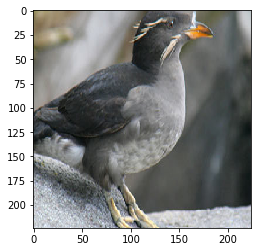

In [20]:
import matplotlib.pyplot as plt
plt.imshow(imgs[339]/255)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# minMax = StandardScaler()
# imgs = minMax.fit_transform(imgs)
# imgs[1]
min_size_x=min_size_x/255
xtr,xte,ytr,yte=train_test_split(min_size_x,min_size_y_,test_size=0.2,random_state=1)

In [70]:
 minMax.fit_transform?

Object `minMax.fit_transform` not found.


In [71]:
model = Sequential()
# BLOCK 1
model.add(Conv2D(filters = 64, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block1_conv1', input_shape = (224, 224, 3)))   
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block2_pool1'))
model.add(Conv2D(filters = 128, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block1_conv2'))
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block1_pool2'))
 
# BLOCK2
model.add(Conv2D(filters = 256, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block2_conv1'))
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block2_pool3'))
model.add(Conv2D(filters = 512, kernel_size = (9, 9), activation = 'tanh', padding = 'same', name = 'block2_conv2'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), name = 'block2_pool4'))
 
# BLOCK3
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv1'))   
# # model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv3'))
# model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block3_pool'))
 
# # BLOCK4
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv1'))   
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv3'))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'block4_pool'))
 
# # BLOCK5
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv1'))   
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv3'))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'block5_pool'))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu', name = 'fc1'))
# model.add(Dropout(rate=0.2))
model.add(Dense(1024, activation = 'relu', name = 'fc2'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,  name = 'prediction'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      15616     
_________________________________________________________________
block2_pool1 (MaxPooling2D)  (None, 56, 56, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 128)       663680    
_________________________________________________________________
block1_pool2 (MaxPooling2D)  (None, 14, 14, 128)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 256)       2654464   
_________________________________________________________________
block2_pool3 (MaxPooling2D)  (None, 3, 3, 256)         0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 3, 3, 512)         10617344  
__________

In [75]:
model.compile(optimizer=Adam(0.00001),
              #loss='mse',
              loss='hinge',
              #loss='categorical_crossentropy',
              #loss='binary_crossentropy',
              #metrics=['binary_accuracy']
             )

In [80]:
model.fit(xtr, ytr, epochs=100,validation_data=(xte,yte) )

Train on 271 samples, validate on 68 samples
Epoch 1/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3281 - val_loss: 0.3571
Epoch 2/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3385 - val_loss: 0.3906
Epoch 3/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3270 - val_loss: 0.3660
Epoch 4/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3234 - val_loss: 0.3486
Epoch 5/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3214 - val_loss: 0.3987
Epoch 6/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3255 - val_loss: 0.3493
Epoch 7/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3323 - val_loss: 0.3496
Epoch 8/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3178 - val_loss: 0.3836
Epoch 9/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3243 - val_loss: 0.3619
Epoch 10/100
271/271 [======

271/271 [==============================] - 1s 5ms/sample - loss: 0.2615 - val_loss: 0.3799
Epoch 80/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.2780 - val_loss: 0.3350
Epoch 81/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.2615 - val_loss: 0.3799
Epoch 82/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.2619 - val_loss: 0.3028
Epoch 83/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.2665 - val_loss: 0.4103
Epoch 84/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3050 - val_loss: 0.3095
Epoch 85/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3036 - val_loss: 0.4254
Epoch 86/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.3246 - val_loss: 0.3929
Epoch 87/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.2894 - val_loss: 0.3389
Epoch 88/100
271/271 [==============================] - 1s 5ms/sample - loss:

In [81]:
model.compile?

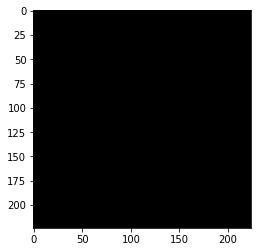

[1.0206361]


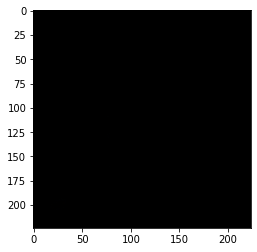

[1.039248]


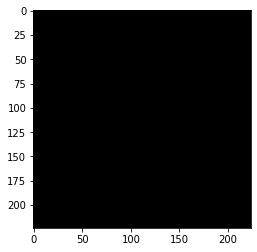

[1.1218905]


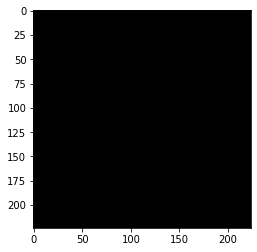

[1.0947601]


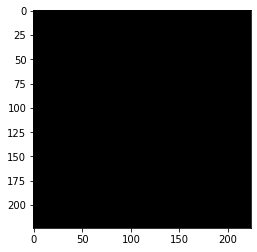

[1.0336442]


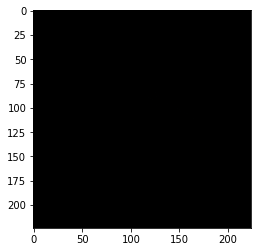

[1.2120864]


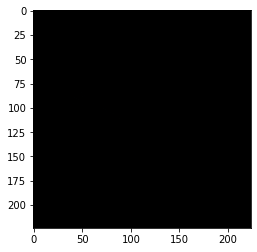

[1.1934772]


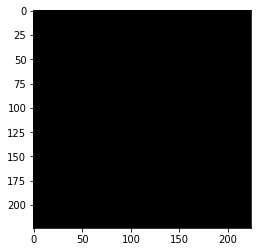

[1.2154115]


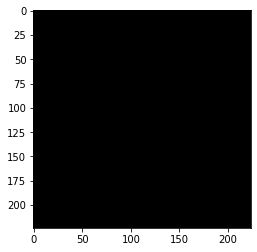

[1.2379874]


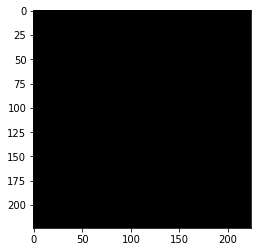

[1.2667124]


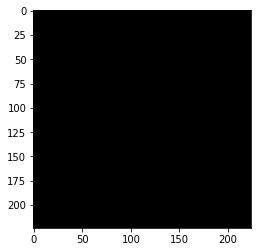

[1.1744311]


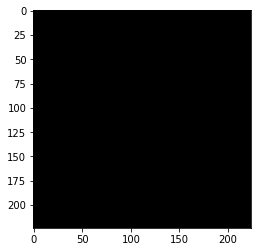

[1.1336912]


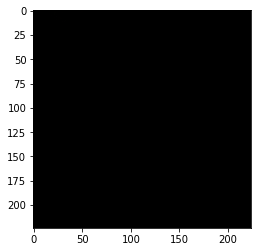

[1.1419066]


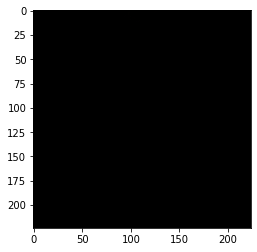

[1.1490593]


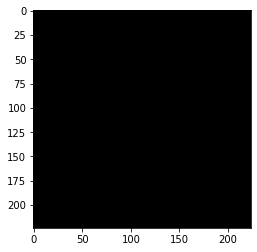

[1.1881866]


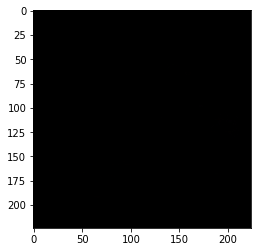

[1.1275363]


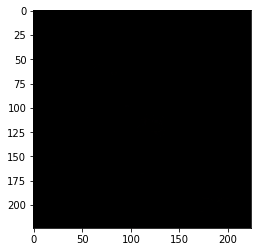

[1.181836]


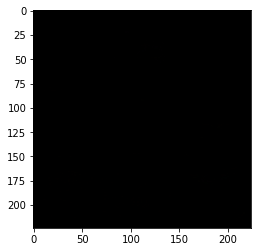

[1.2005414]


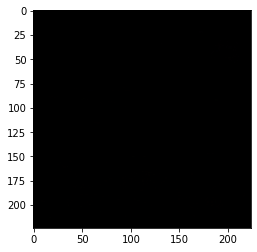

[1.1607593]


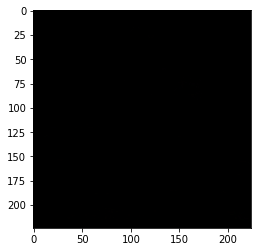

[1.2202966]


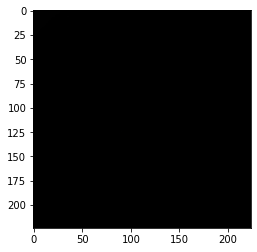

[1.1232551]


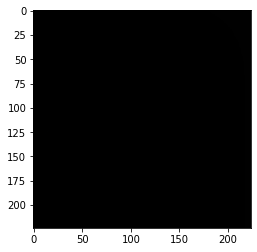

[1.1312072]


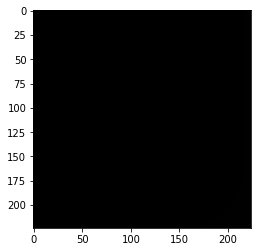

[1.0949446]


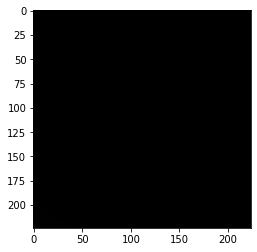

[1.0533127]


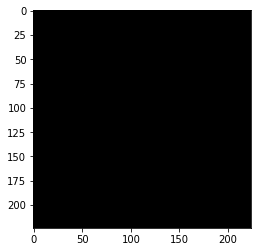

[1.1151974]


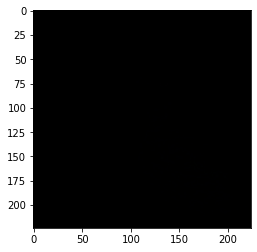

[0.9874096]


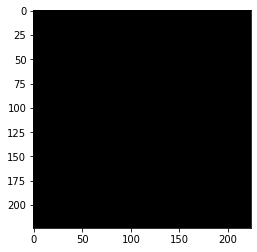

[1.0150149]


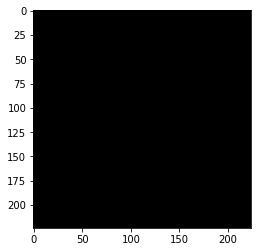

[1.0119089]


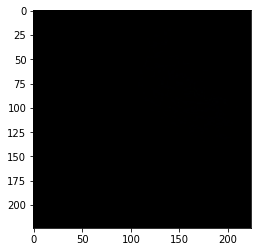

[0.9870831]


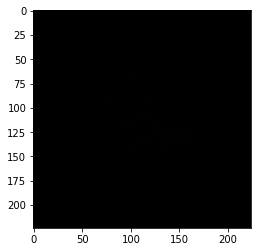

[1.0482082]


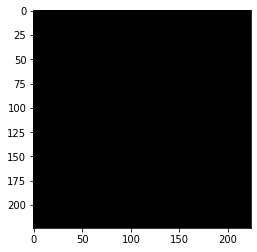

[1.0945188]


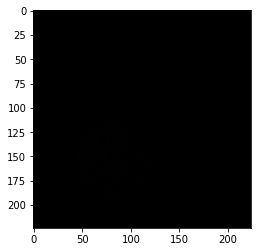

[1.1723918]


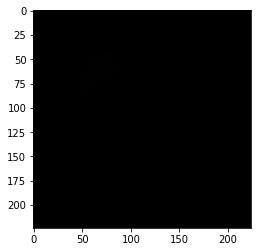

[1.2558124]


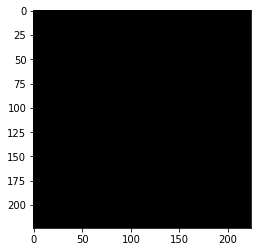

[1.1654538]


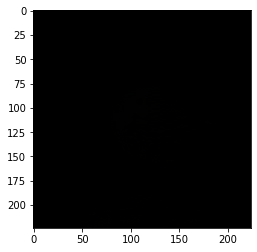

[1.2366188]


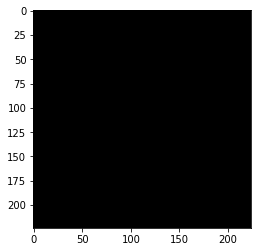

[1.0080644]


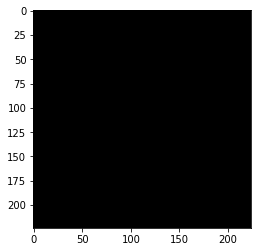

[0.9847895]


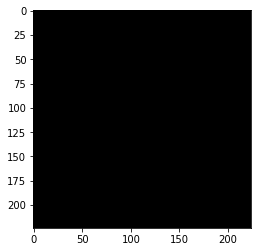

[0.99434936]


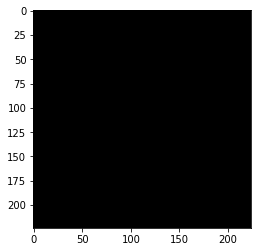

[1.0198202]


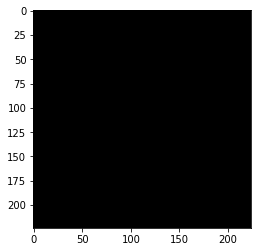

[1.0187958]


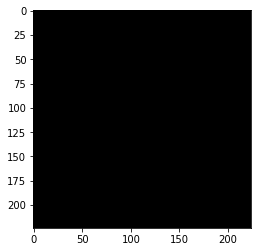

[1.0849814]


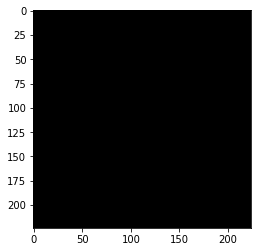

[1.1161311]


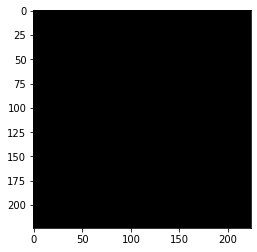

[1.2393327]


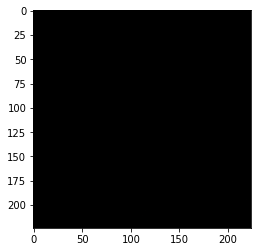

[1.2185473]


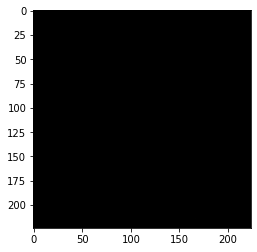

[1.2137465]


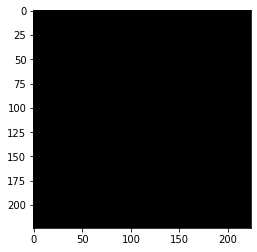

[1.0374395]


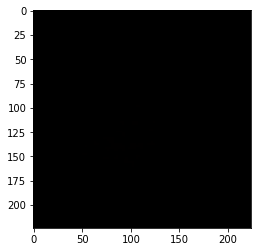

[1.0867084]


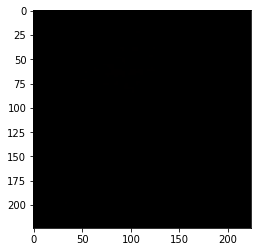

[0.99494135]


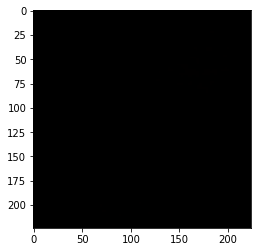

[1.0520365]


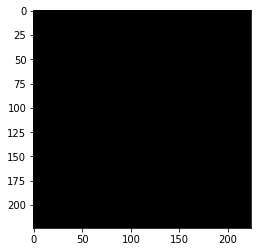

[1.0921735]


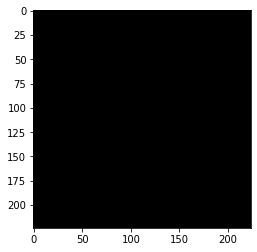

[1.0697114]


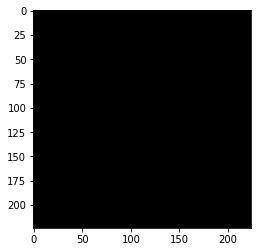

[1.0545568]


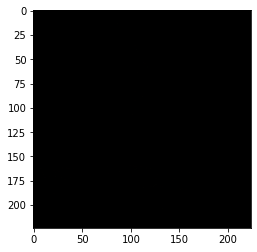

[1.0688661]


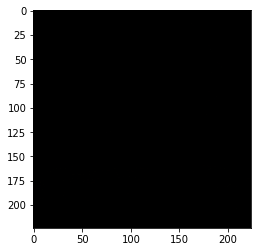

[1.0803627]


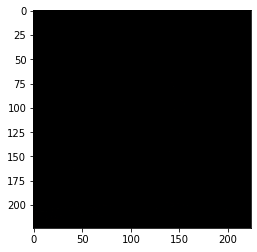

[1.0536631]


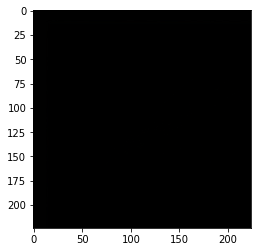

[-1.1367675]


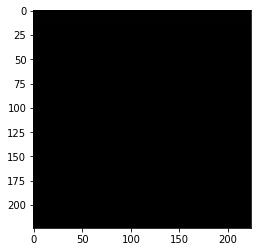

[-1.0690975]


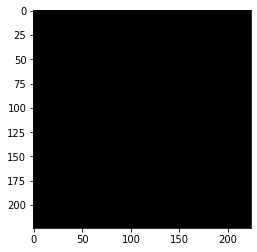

[-1.1926013]


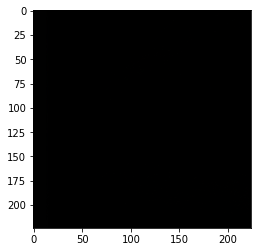

[-1.4079183]


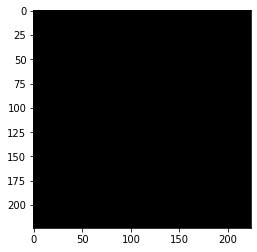

[-1.2305461]


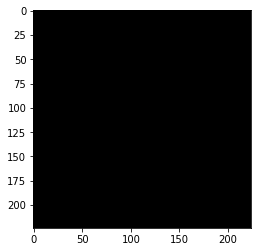

[1.1399521]


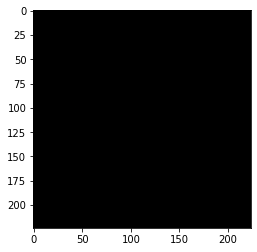

[1.071084]


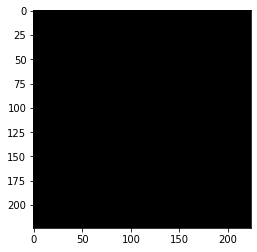

[1.0097568]


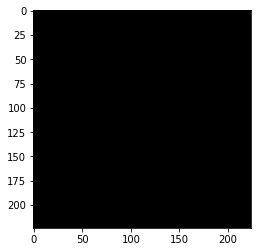

[1.0580634]


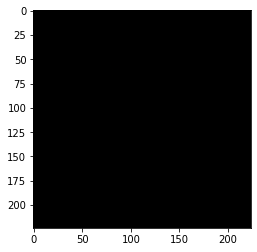

[1.0806012]


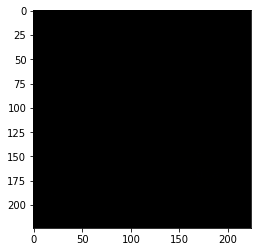

[1.1048476]


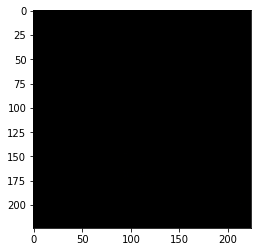

[1.1391721]


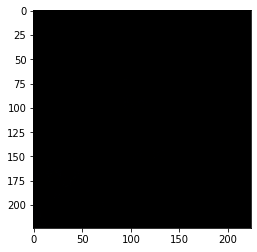

[1.2147104]


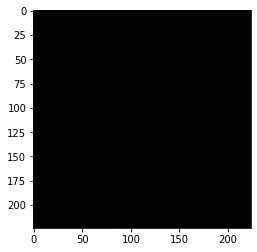

[1.1417433]


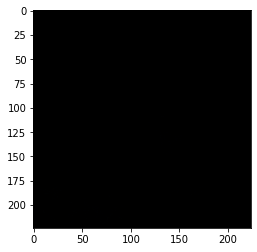

[1.1262617]


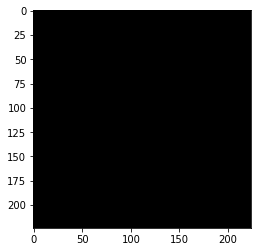

[1.0719588]


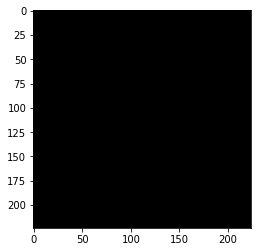

[1.1246343]


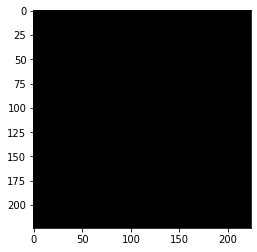

[1.106345]


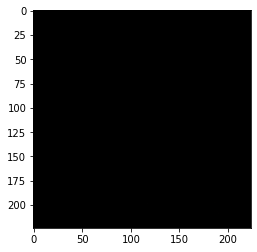

[1.0721213]


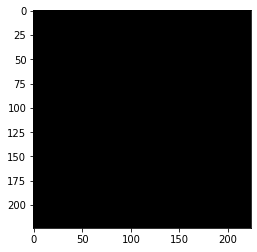

[1.0919977]


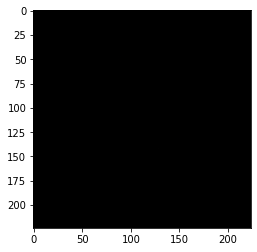

[1.1460705]


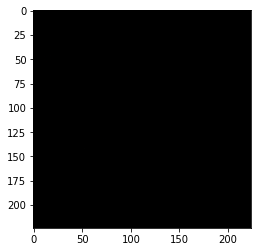

[1.1315349]


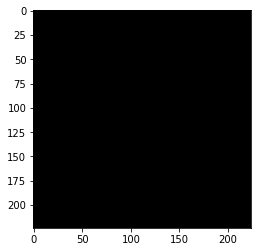

[1.1166382]


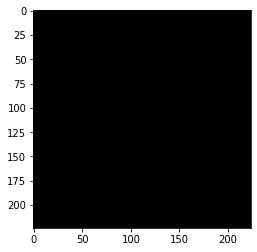

[1.091404]


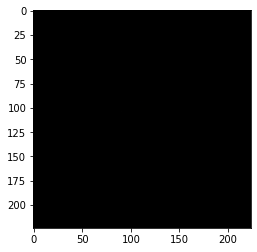

[1.1445625]


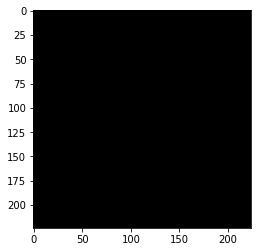

[1.2370027]


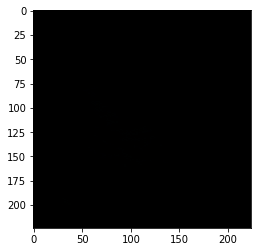

[1.2596055]


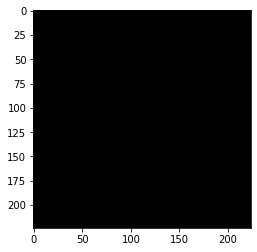

[1.3656993]


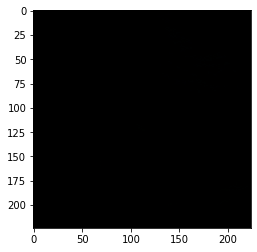

[1.337281]


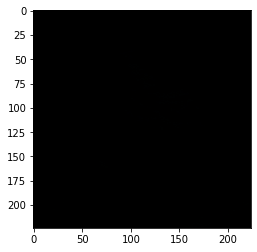

[1.3845958]


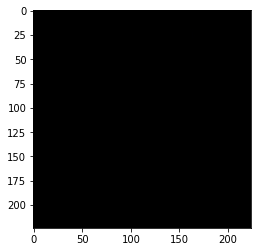

[1.0265182]


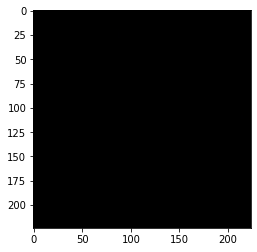

[1.0498024]


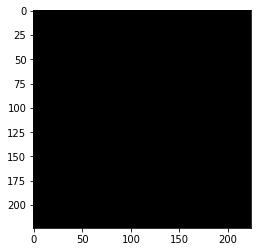

[1.0395912]


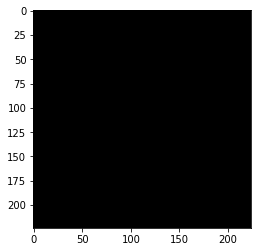

[0.9947966]


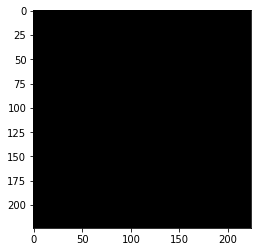

[1.0269665]


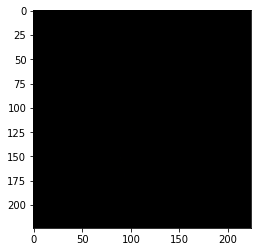

[0.965128]


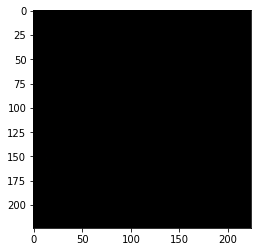

[0.94178516]


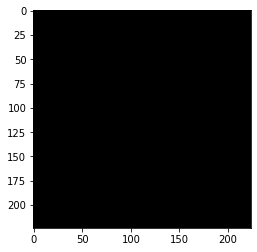

[1.0434455]


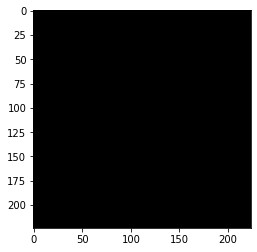

[1.0730867]


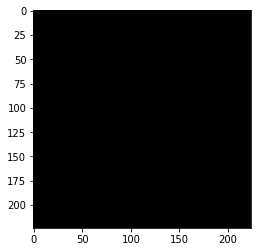

[1.025112]


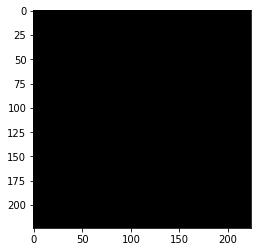

[0.9735796]


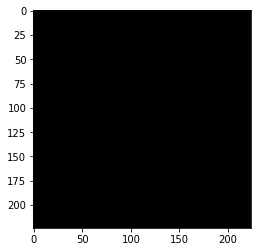

[1.1635513]


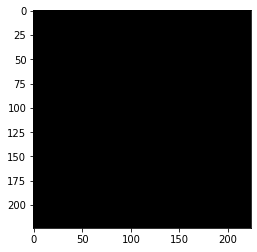

[1.2476319]


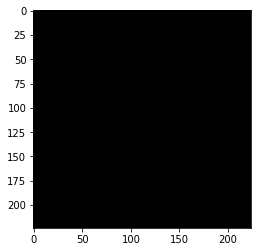

[1.2072186]


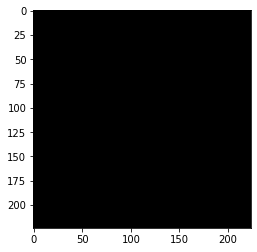

[1.2290682]


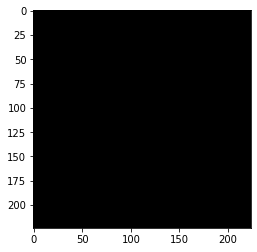

[1.0074117]


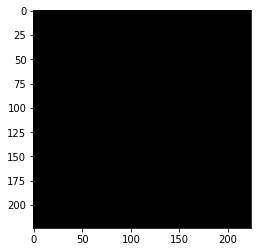

[0.96568084]


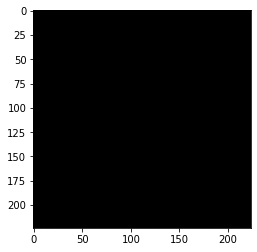

[1.0034131]


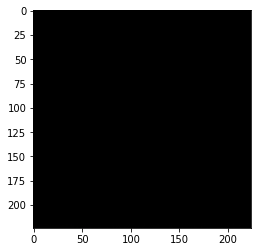

[1.0260117]


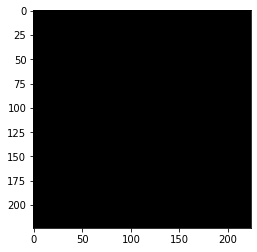

[1.0060045]


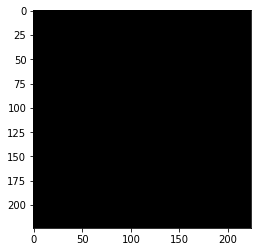

[1.0588683]


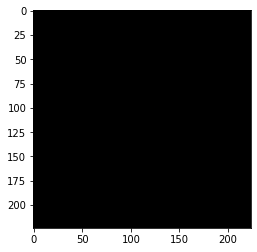

[1.0427203]


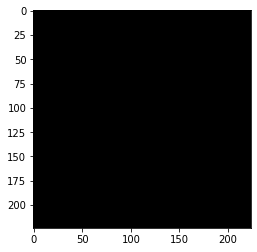

[1.0951668]


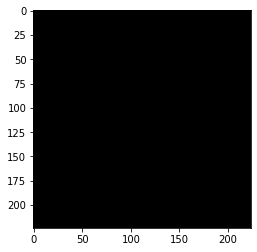

[1.1258411]


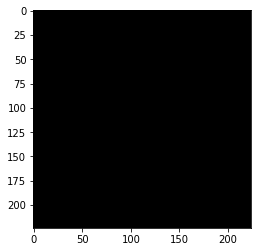

[1.1157953]


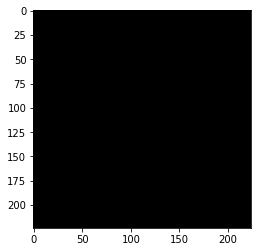

[1.017821]


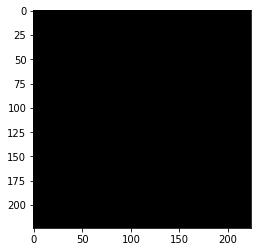

[1.0798634]


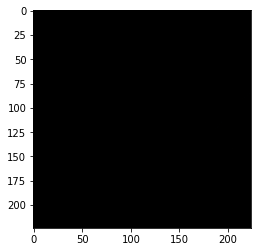

[1.1032735]


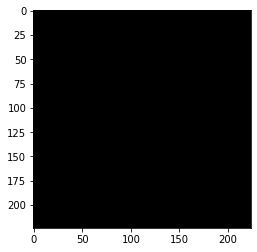

[1.0247322]


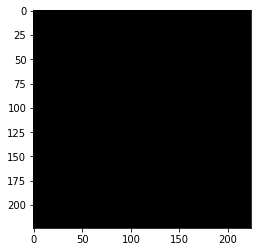

[1.0832807]


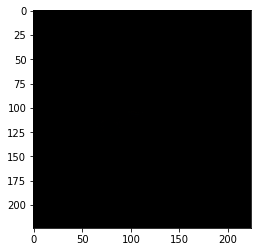

[1.1685392]


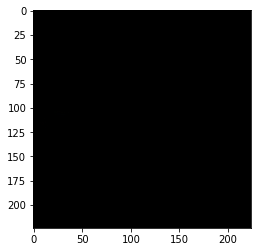

[1.1922529]


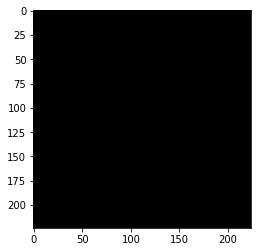

[1.2338129]


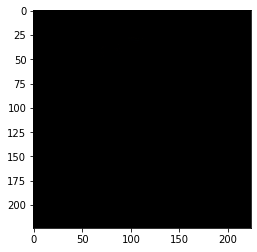

[1.2015443]


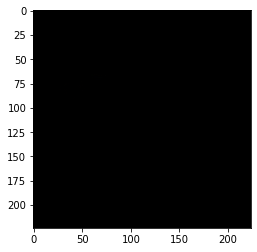

[1.2124251]


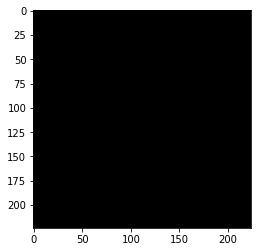

[1.0966405]


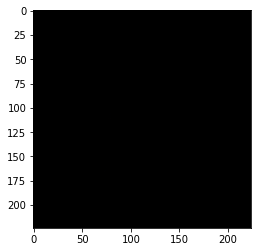

[1.0433438]


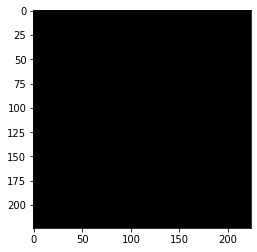

[1.0790569]


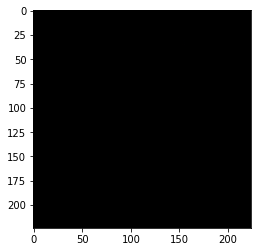

[1.1473148]


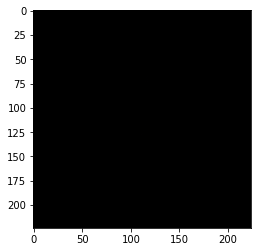

[1.1097773]


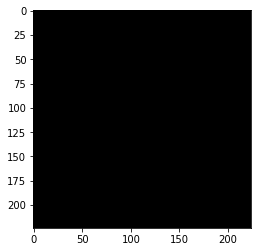

[1.0117431]


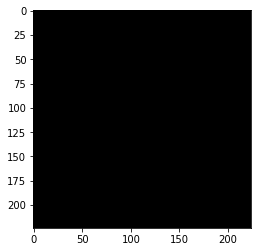

[0.99467397]


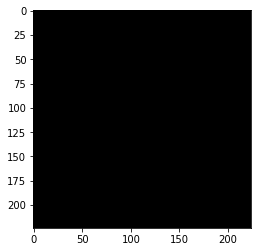

[1.0081625]


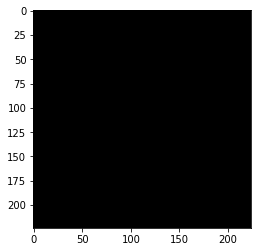

[1.0222486]


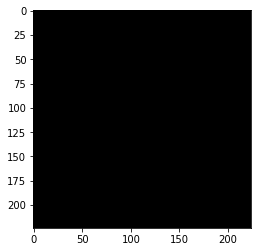

[1.0131301]


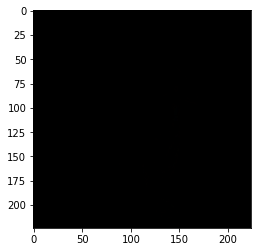

[1.0433552]


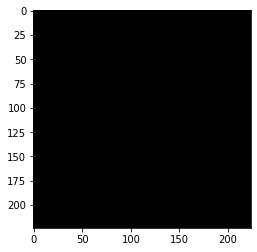

[0.9738956]


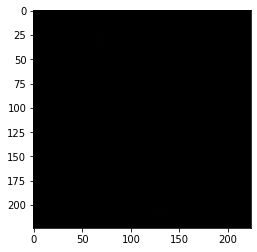

[1.047404]


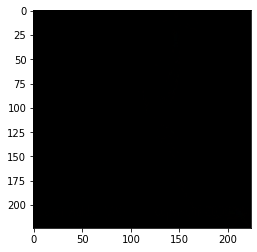

[1.1745154]


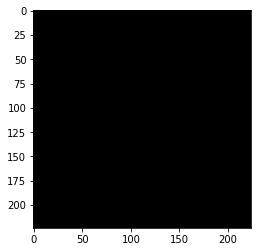

[1.0979837]


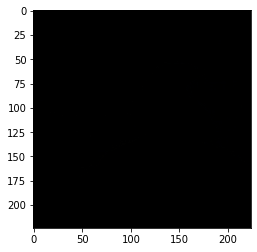

[1.2130086]


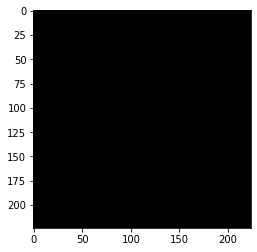

[1.260188]


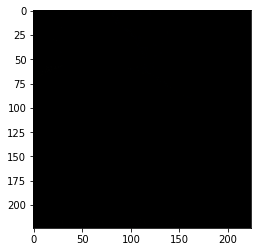

[1.0874435]


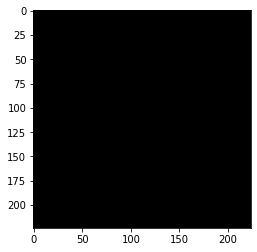

[1.0500344]


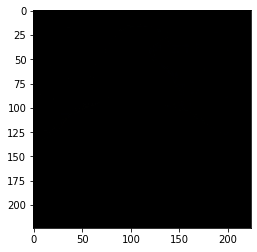

[1.1711953]


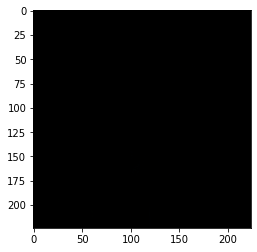

[1.0999752]


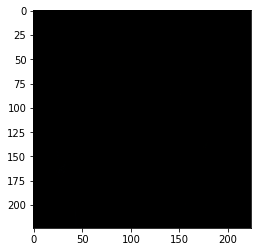

[1.159967]


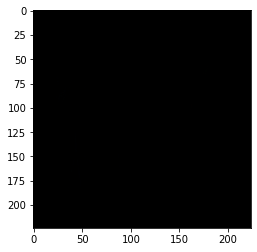

[1.1486396]


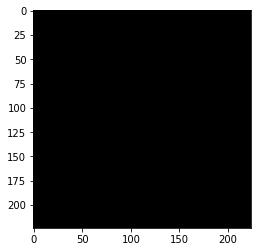

[1.1294799]


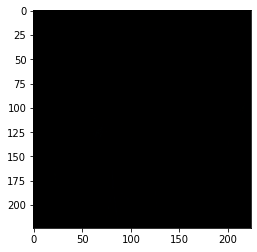

[1.1510975]


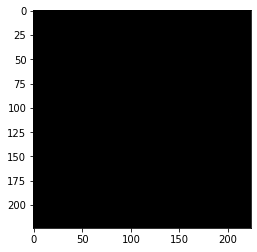

[0.9942941]


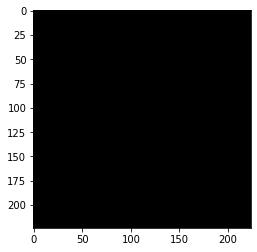

[1.0712636]


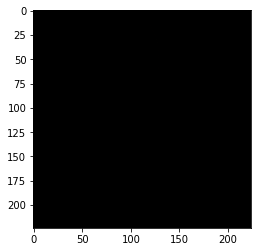

[1.1285437]


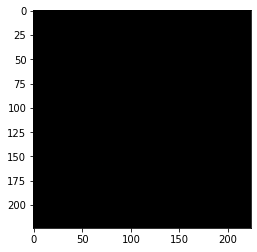

[1.0667634]


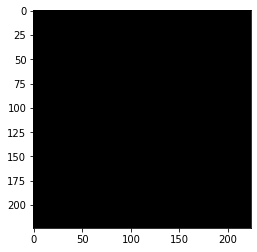

[1.0907527]


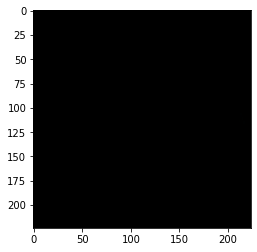

[1.1206839]


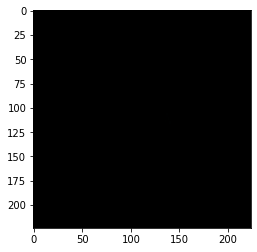

[1.1019847]


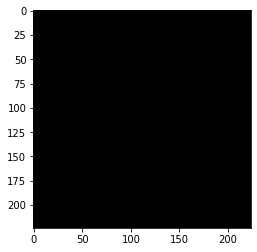

[1.0569268]


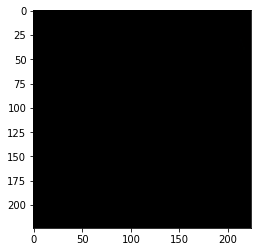

[1.0889522]


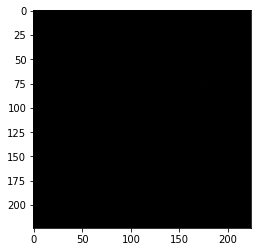

[1.1452695]


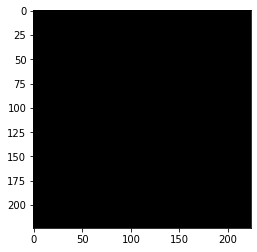

[1.0546465]


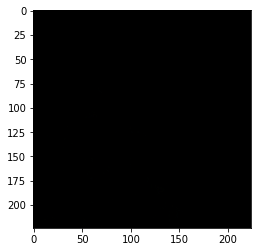

[1.0320934]


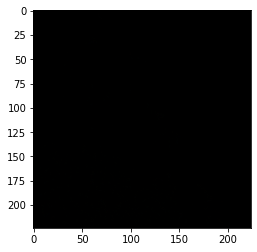

[1.1075652]


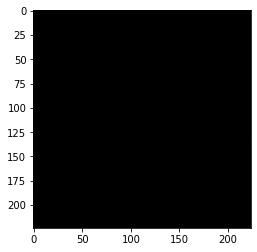

[1.1008027]


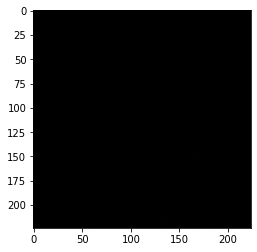

[1.0753827]


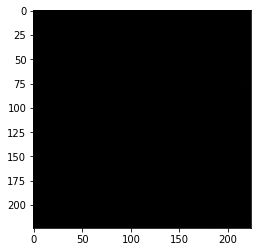

[1.0362079]


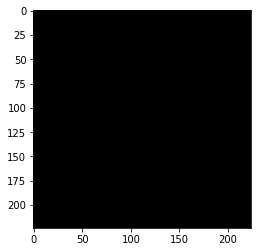

[1.175724]


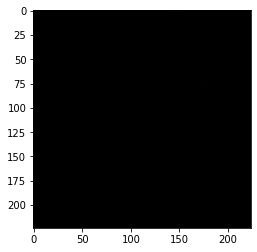

[1.1911951]


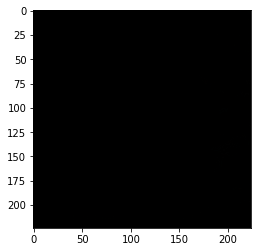

[1.0658376]


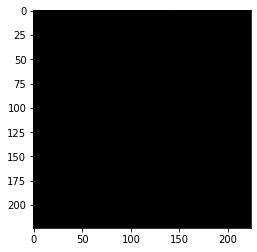

[1.1640031]


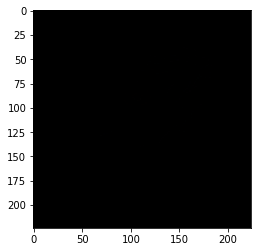

[1.1781046]


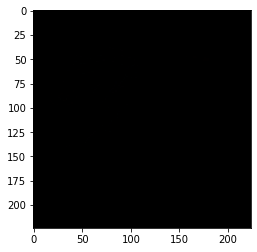

[1.1950076]


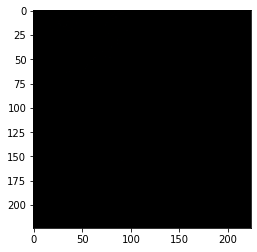

[1.1359247]


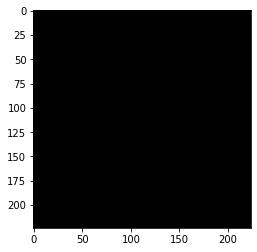

[1.1467392]


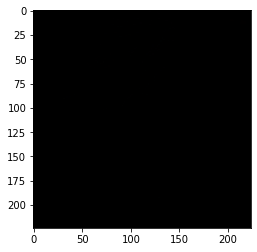

[1.2658361]


In [82]:
rs=model.predict(min_size_x[0:170])
for i in range(len(rs)):
    plt.imshow(min_size_x[i])
    plt.show()
    print(rs[i])

In [ ]:
Dropout?

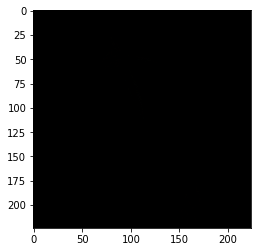

[-1.2438215]


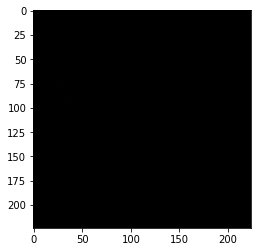

[-1.254457]


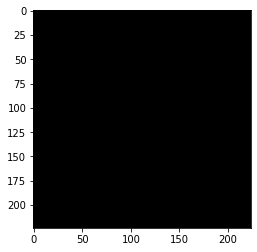

[-1.2114649]


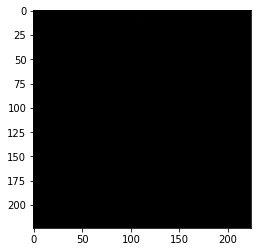

[-1.2203267]


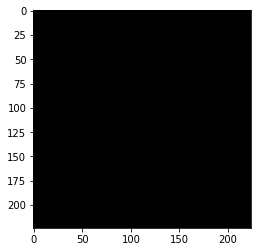

[-1.2116557]


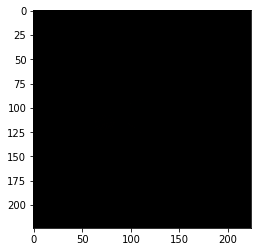

[-1.3054793]


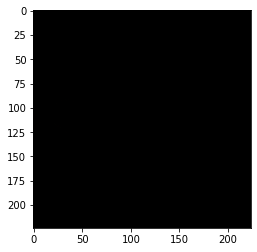

[-1.2921436]


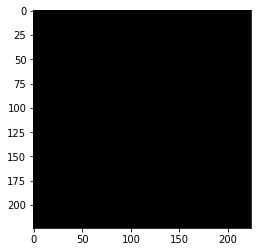

[-1.3230736]


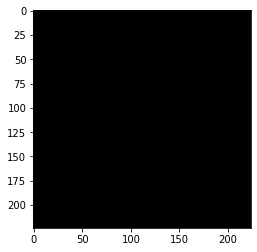

[-1.3396834]


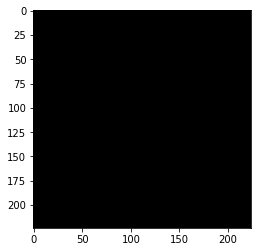

[-1.3692138]


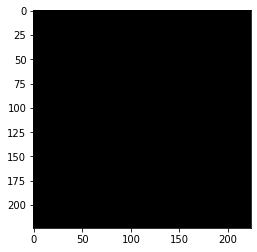

[-1.0729922]


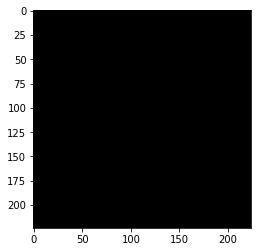

[-1.0335929]


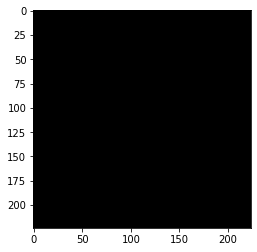

[-1.0630541]


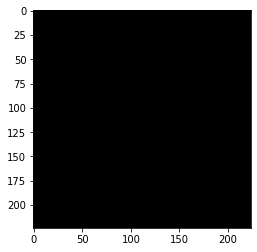

[-1.1306878]


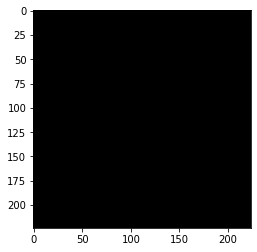

[-1.0964459]


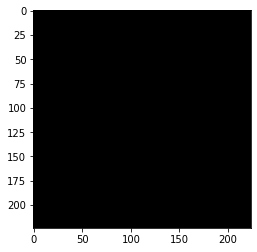

[-0.94134384]


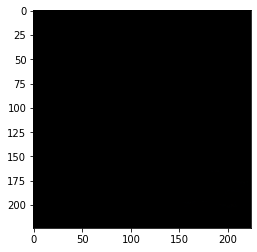

[-1.046023]


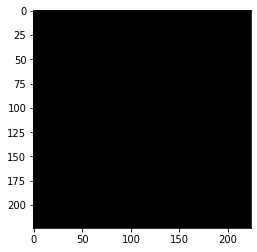

[-1.1550972]


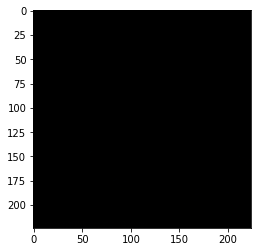

[-1.0611521]


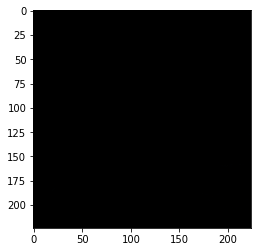

[-1.0527483]


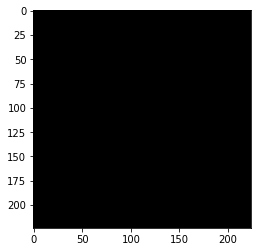

[0.98845845]


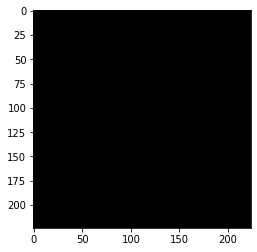

[0.9530007]


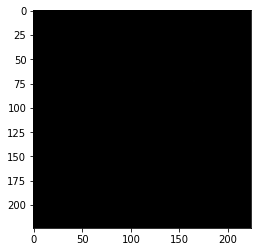

[1.0221002]


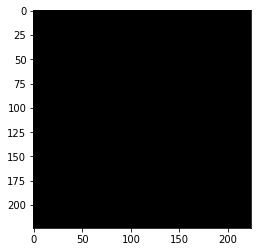

[1.0455426]


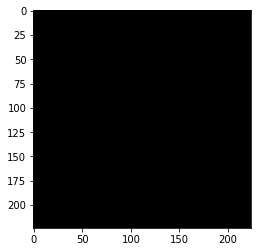

[1.0149893]


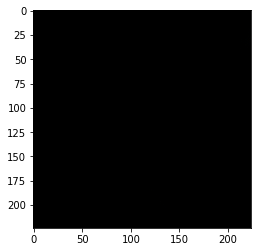

[0.9805365]


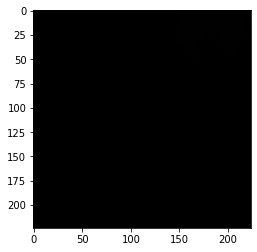

[1.0848525]


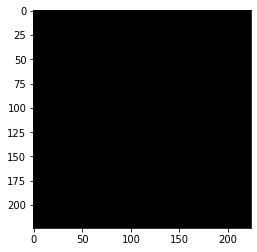

[1.0006906]


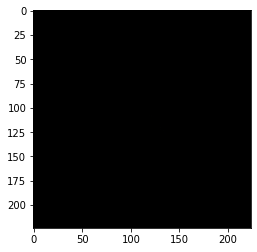

[0.03067544]


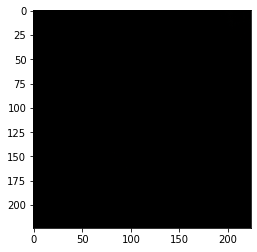

[0.9746592]


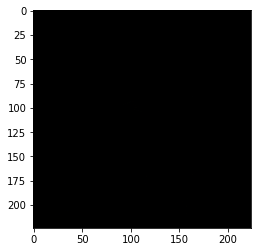

[-1.2513417]


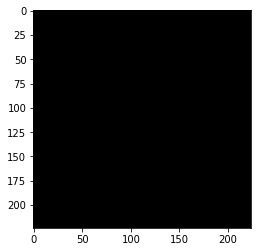

[-1.2278782]


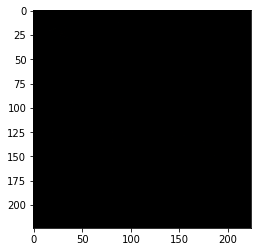

[-1.3901901]


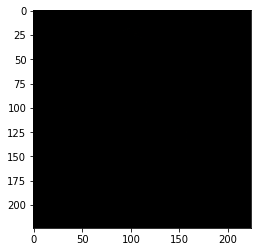

[-1.4407141]


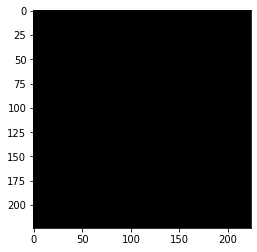

[-1.2998981]


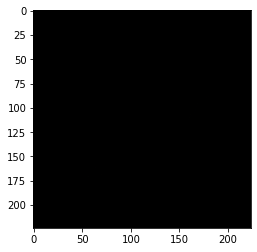

[-1.1898968]


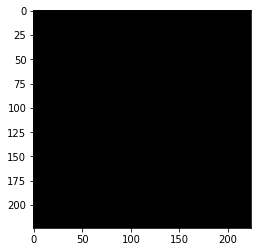

[-1.1884159]


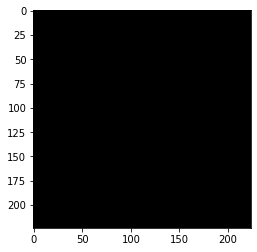

[-1.2269825]


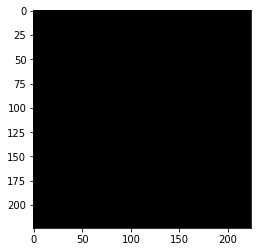

[-1.2900567]


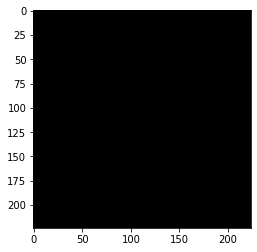

[-1.2430152]


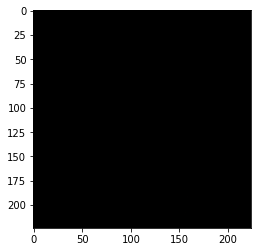

[-1.1788586]


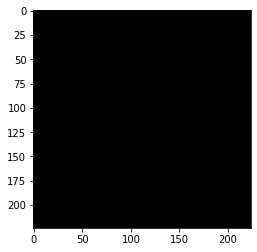

[-1.1137861]


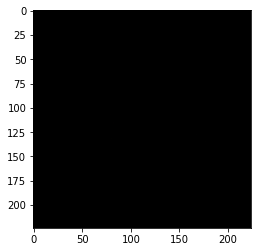

[-1.2414138]


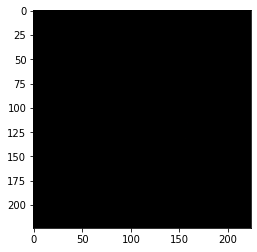

[-1.24502]


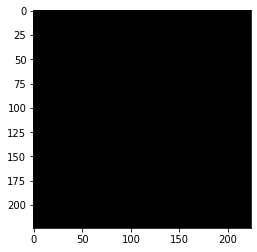

[-1.1898886]


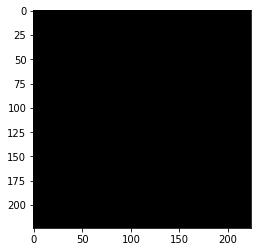

[-1.2721827]


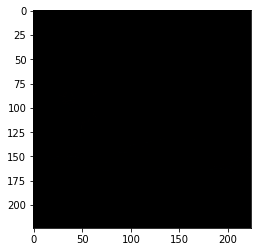

[-1.2606657]


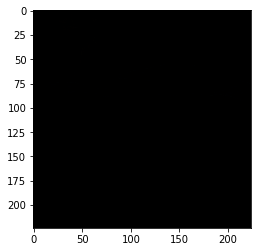

[-1.308511]


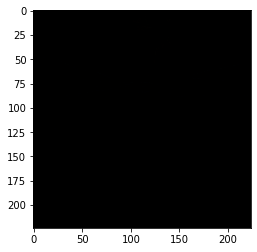

[-1.3937173]


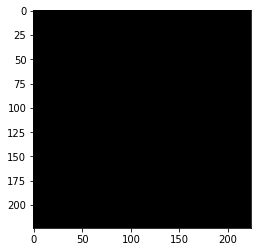

[-1.3501524]


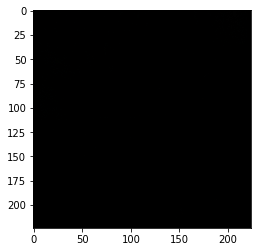

[-1.2213899]


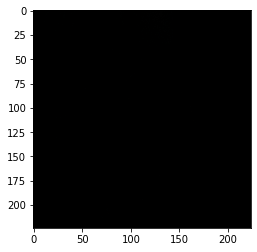

[-0.91019]


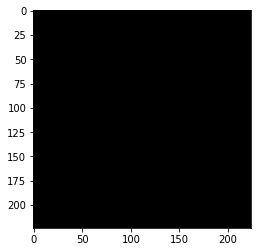

[-0.77429235]


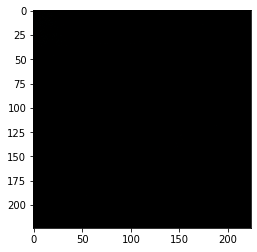

[-1.0978293]


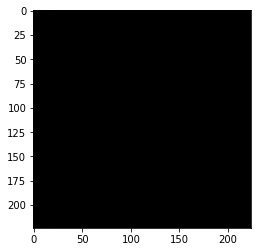

[-1.1925111]


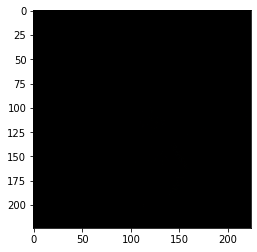

[-1.5203924]


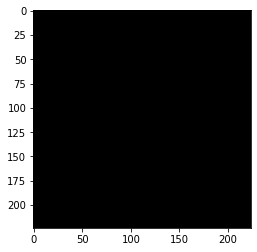

[-1.5755838]


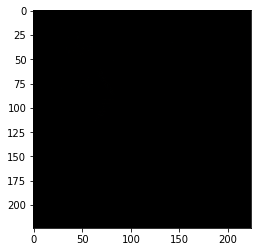

[-1.610892]


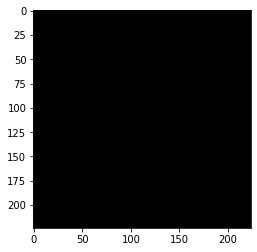

[-1.6077241]


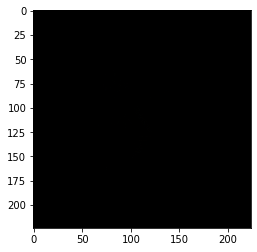

[-1.6091413]


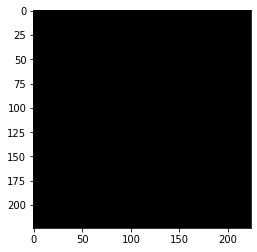

[-1.0715737]


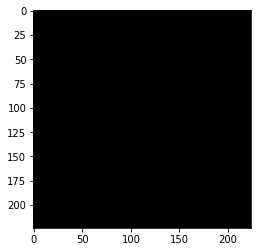

[-1.1431855]


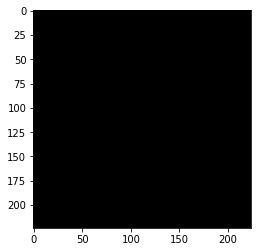

[-1.3438907]


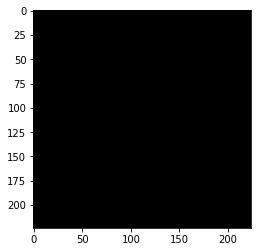

[-1.3570019]


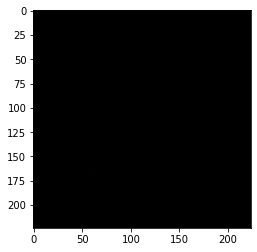

[-1.2379721]


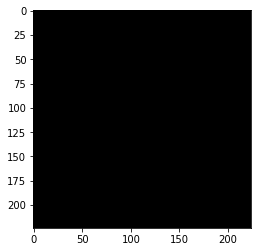

[-0.96707875]


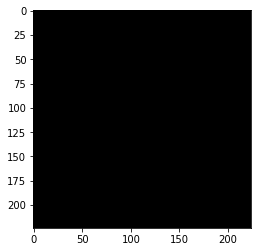

[-0.99866855]


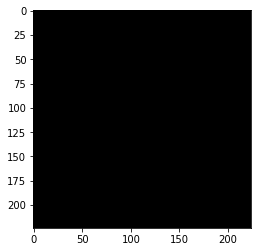

[-1.0472131]


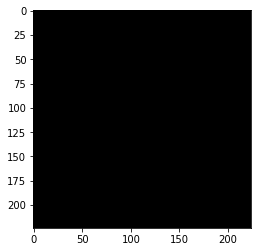

[-1.0266321]


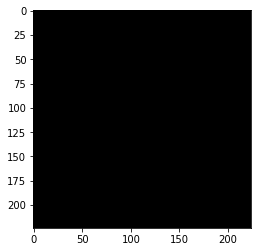

[-1.0624666]


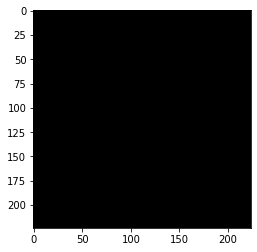

[-0.17868383]


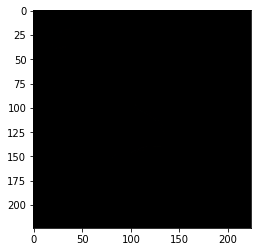

[0.5777557]


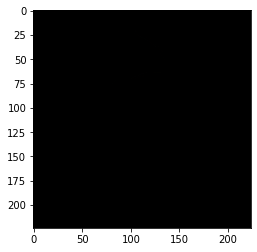

[0.54087824]


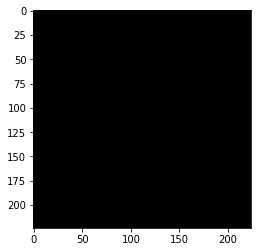

[-0.9855721]


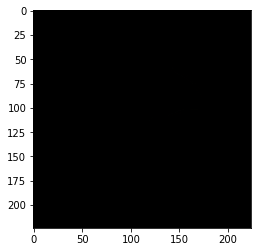

[-0.57288367]


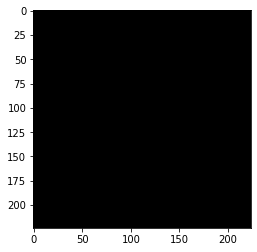

[-0.9734582]


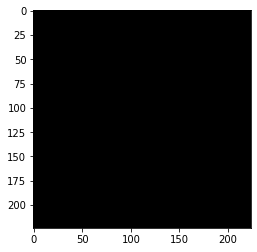

[-1.0259275]


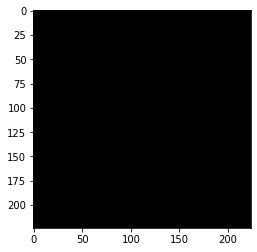

[-1.1555465]


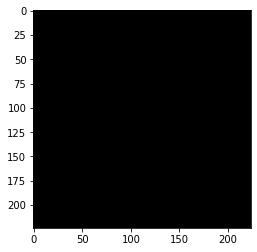

[-1.2099066]


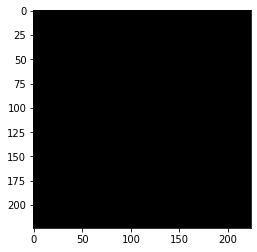

[-1.0443279]


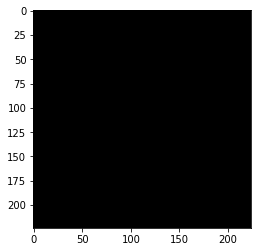

[-1.0795146]


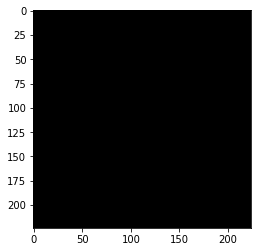

[-1.038736]


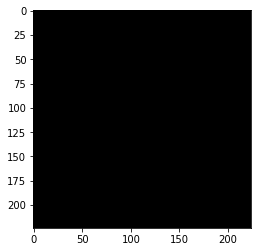

[-1.0472529]


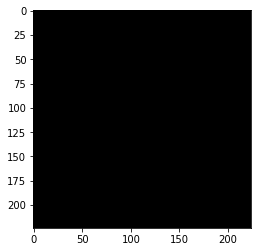

[-1.0748065]


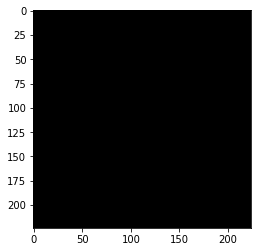

[-1.0382092]


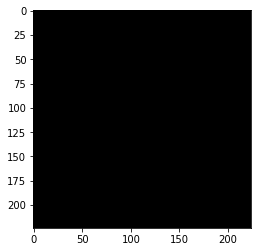

[0.9393189]


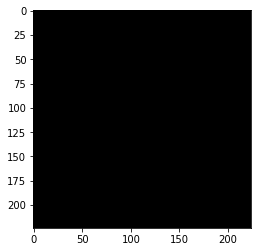

[0.94846386]


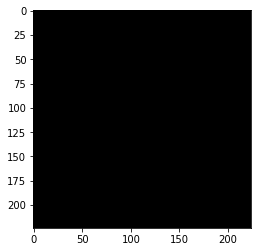

[0.8658599]


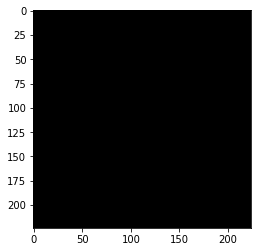

[0.90656406]


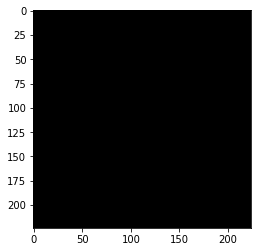

[0.9284504]


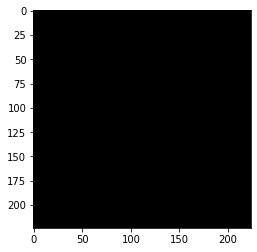

[-1.2213916]


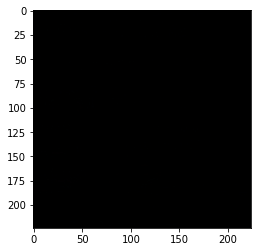

[-1.2955898]


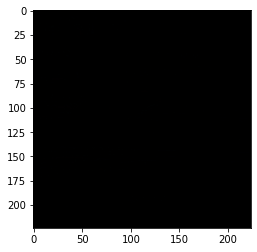

[-1.3791707]


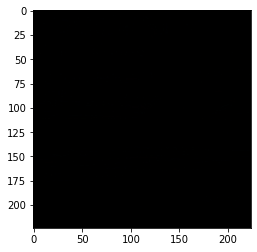

[-1.3008614]


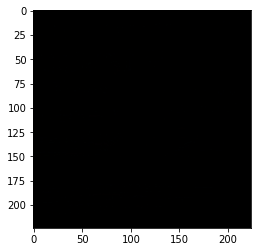

[-1.3086686]


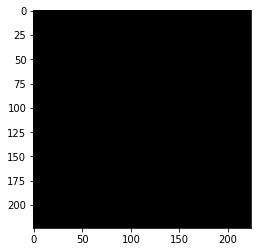

[-1.1833538]


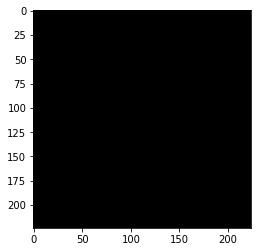

[-1.2719816]


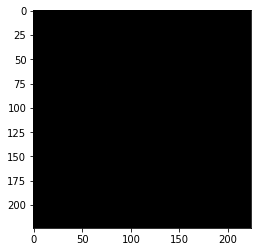

[-1.2389612]


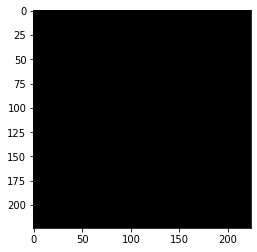

[-1.296351]


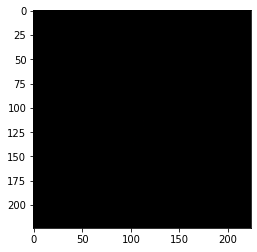

[-1.2763844]


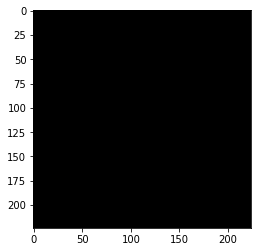

[0.99742377]


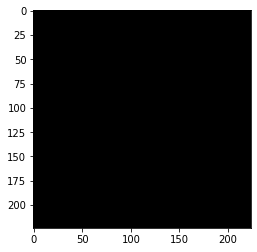

[0.9843096]


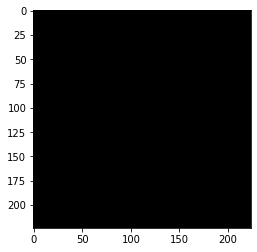

[0.9900362]


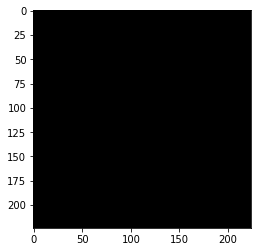

[1.0046229]


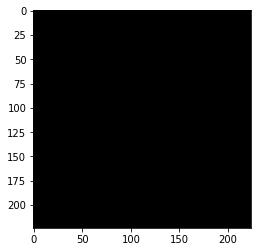

[0.977105]


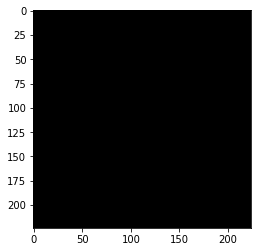

[-1.0967317]


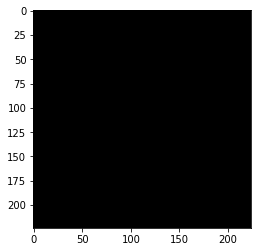

[-1.0521203]


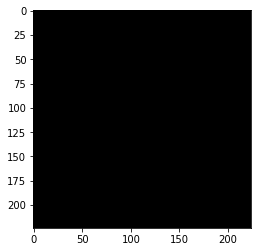

[-1.0406412]


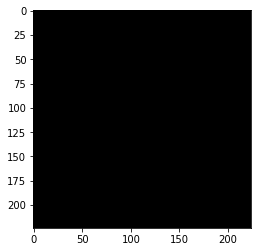

[-1.1808835]


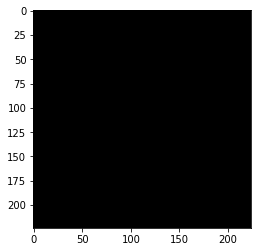

[-1.0920628]


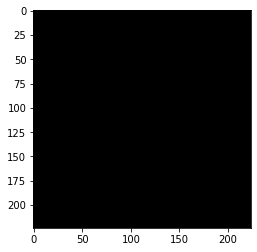

[-1.5154043]


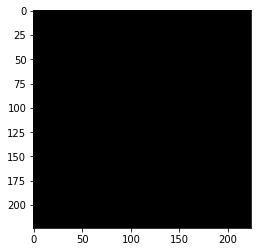

[-1.5312933]


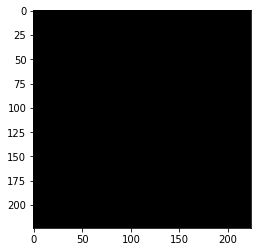

[-1.6026319]


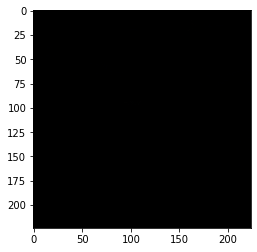

[-1.659144]


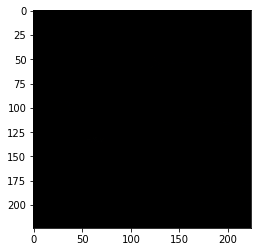

[-1.640608]


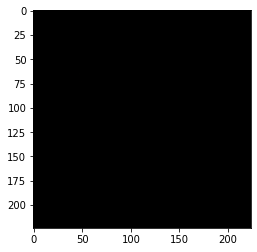

[-1.2288823]


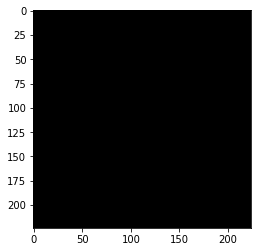

[-1.2498367]


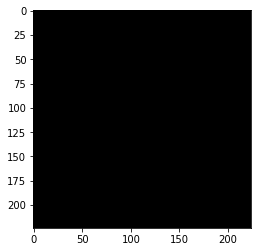

[-1.3201784]


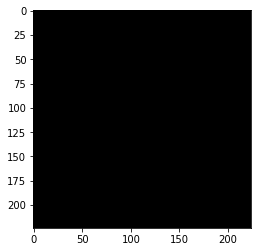

[-1.2394434]


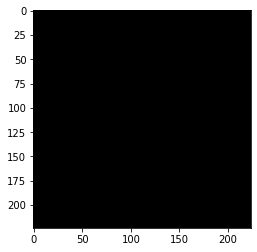

[-1.1790607]


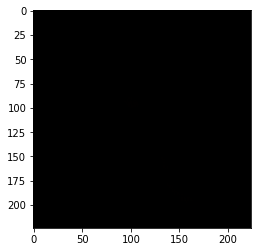

[-1.2208481]


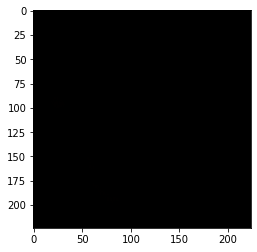

[-1.242062]


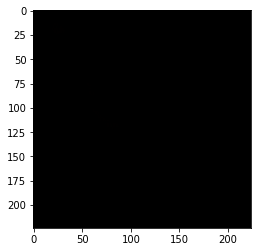

[-1.2146846]


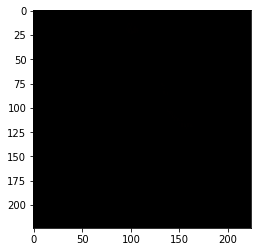

[-1.2470533]


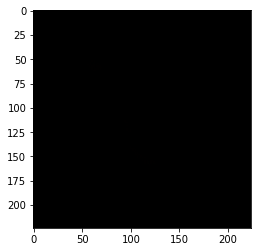

[-1.2492471]


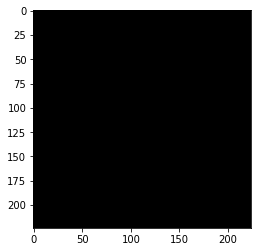

[1.0170857]


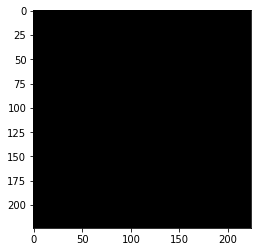

[1.0168967]


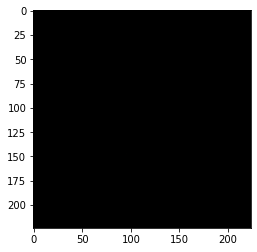

[0.98745877]


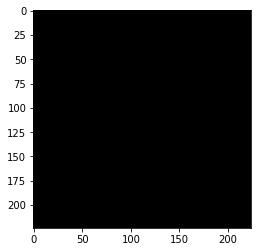

[0.97575593]


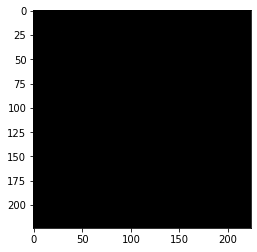

[0.98457617]


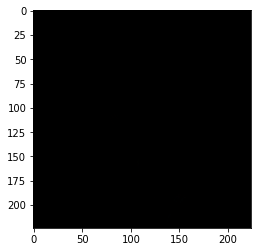

[-1.6378762]


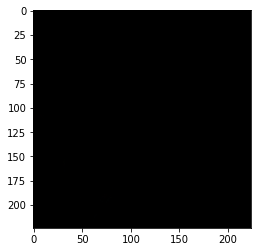

[-1.6682264]


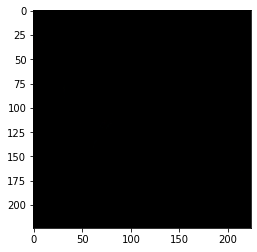

[-1.5501486]


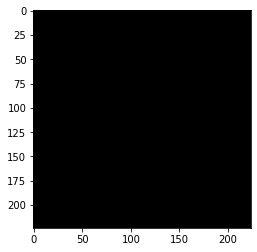

[-1.626874]


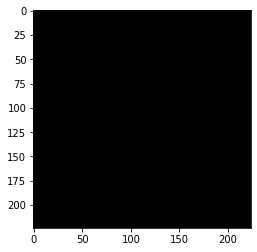

[-1.6399828]


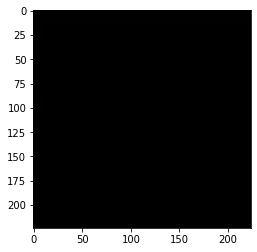

[-1.4413154]


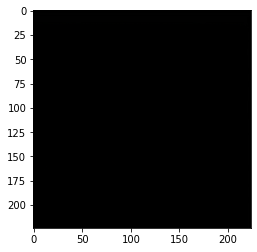

[-1.3415734]


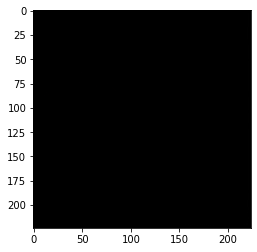

[-1.3302972]


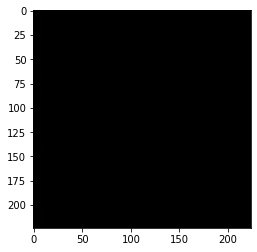

[-1.487194]


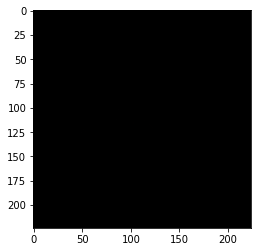

[-1.3956189]


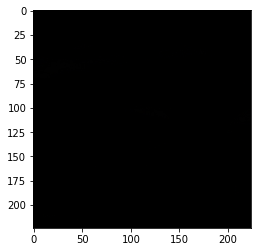

[-0.13289581]


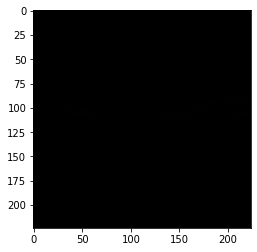

[-0.984674]


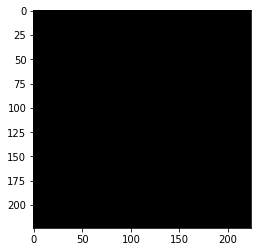

[-1.2319361]


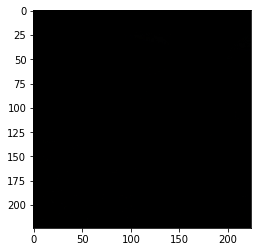

[-1.2866685]


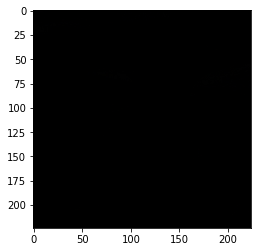

[-1.1099521]


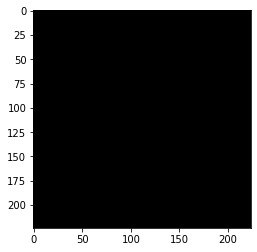

[1.0019643]


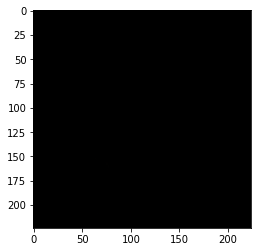

[1.041425]


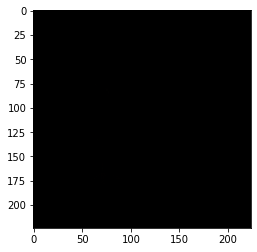

[1.087522]


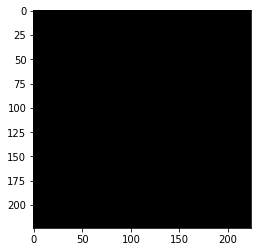

[1.0563885]


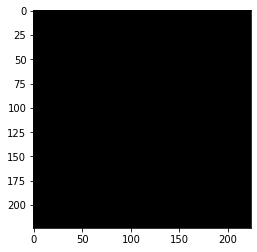

[1.0944631]


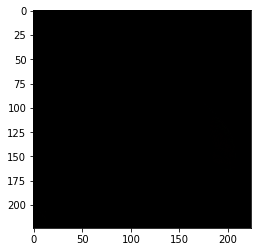

[1.0210693]


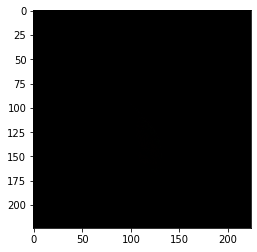

[0.9897828]


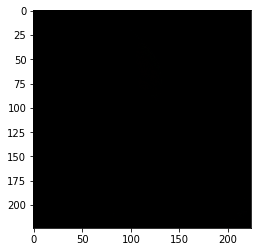

[0.75592935]


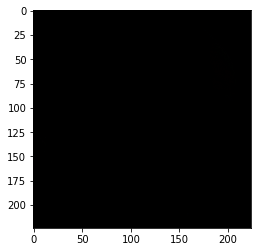

[0.31283364]


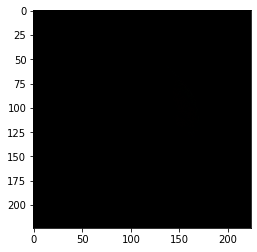

[1.0235568]


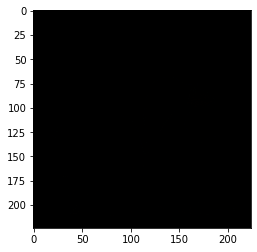

[-1.1245185]


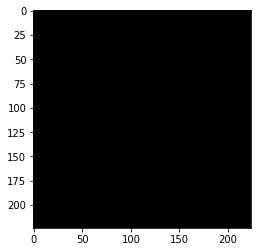

[-1.1426259]


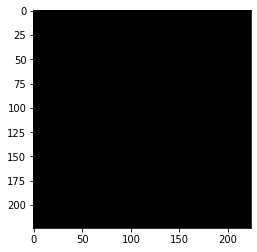

[-1.3118705]


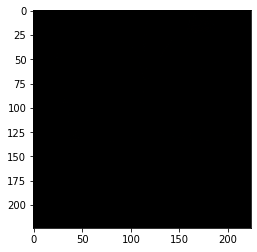

[-1.3663146]


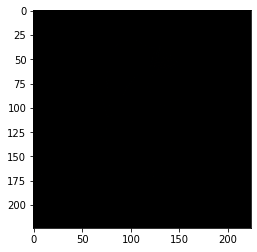

[-1.2065972]


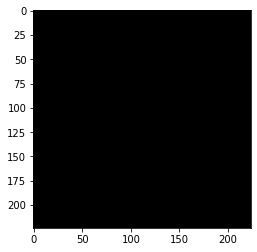

[0.39186883]


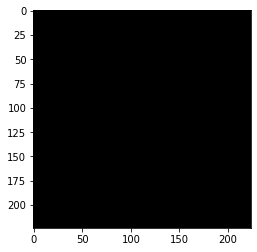

[-0.65982014]


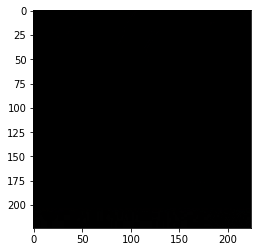

[-1.1346549]


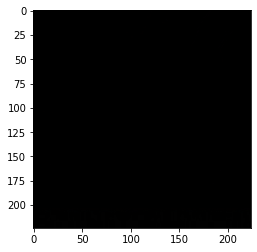

[-1.0645195]


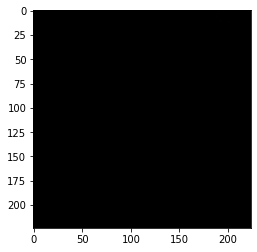

[-1.0979717]


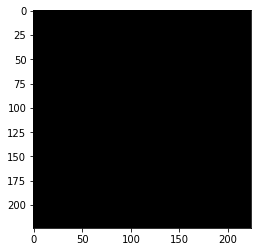

[0.986666]


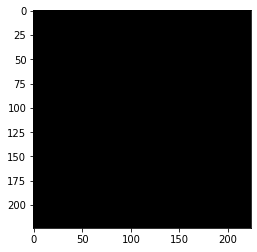

[1.0104215]


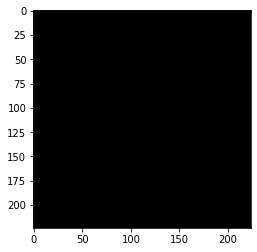

[0.08737998]


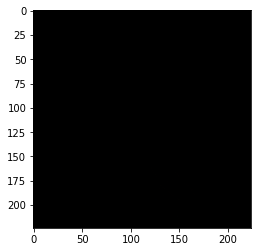

[-0.47904244]


In [79]:
rs=model.predict(min_size_x[170:341])
for i in range(len(rs)):
    plt.imshow(min_size_x[170+i])
    plt.show()
    print(rs[i])